In [1]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importação dos dados 
dataset = pd.read_csv('../dados/dadosFirstTime.csv', low_memory=False)

In [3]:
dataset.columns

Index(['País', 'Campeonato', 'timeMandante', 'timeVisitante', 'Posse de bolaM',
       'Posse de bolaV', 'Tentativas de golM', 'Tentativas de golV',
       'FinalizaçõesM', 'FinalizaçõesV', 'Chutes foraM', 'Chutes foraV',
       'Chutes bloqueadosM', 'Chutes bloqueadosV', 'Faltas cobradasM',
       'Faltas cobradasV', 'EscanteiosM', 'EscanteiosV', 'ImpedimentosM',
       'ImpedimentosV', 'Defesas do goleiroM', 'Defesas do goleiroV',
       'FaltasM', 'FaltasV', 'Cartões amarelosM', 'Cartões amarelosV',
       'Cartões VermelhosM', 'Cartões VermelhosV', 'Total de passesM',
       'Total de passesV', 'DesarmesM', 'DesarmesV', 'AtaquesM', 'AtaquesV',
       'Ataques PerigososM', 'Ataques PerigososV', 'OddM', 'OddE', 'OddV',
       'DiferencaGols', 'PlacarPrimeiroTempo', 'PlacarFinal'],
      dtype='object')

In [4]:
dataset.drop(['País', 'Campeonato', 'timeMandante', 'timeVisitante', 'FaltasM', 'FaltasV', 'Chutes bloqueadosM',
             'Chutes bloqueadosV'], axis=1, inplace=True)

In [5]:
X = dataset

In [6]:
##Somente duas classes
#X = X.loc[X['PlacarFinal'] != 'E']

In [7]:
X.PlacarFinal.unique()

array(['D', 'V', 'E'], dtype=object)

In [8]:
X.isnull().sum().sort_values(ascending=False)

DesarmesV              14903
DesarmesM              14903
Total de passesV       14052
Total de passesM       14052
AtaquesV               12383
AtaquesM               12383
Ataques PerigososV     12382
Ataques PerigososM     12382
Faltas cobradasM        4775
Faltas cobradasV        4775
Posse de bolaM          2310
Posse de bolaV          2310
ImpedimentosV           1944
ImpedimentosM           1944
Chutes foraM            1879
Chutes foraV            1879
EscanteiosV             1875
EscanteiosM             1875
Defesas do goleiroV     1798
Defesas do goleiroM     1798
Tentativas de golV      1794
Tentativas de golM      1794
FinalizaçõesM           1793
FinalizaçõesV           1793
PlacarFinal                0
PlacarPrimeiroTempo        0
Cartões amarelosV          0
Cartões VermelhosM         0
Cartões VermelhosV         0
OddM                       0
OddE                       0
OddV                       0
DiferencaGols              0
Cartões amarelosM          0
dtype: int64

In [9]:
novos_titulos = {
    'DesarmesM' : 'desarmes_mandante',
    'DesarmesV' : 'desarmes_visitante', 
    'Total de passesM' : 'total_passes_mandante',
    'Total de passesV' : 'total_passes_visitante',
    'AtaquesV' : 'ataques_visitante',
    'AtaquesM' : 'ataques_mandante',      
    'Ataques PerigososV' : 'ataques_perigosos_visitante',   
    'Ataques PerigososM' : 'ataques_perigosos_mandante',   
    'Chutes bloqueadosV' : 'chutes_bloqueados_visitante',    
    'Chutes bloqueadosM' : 'chutes_bloqueados_mandante',    
    'Faltas cobradasV' : 'faltas_cobradas_visitante',      
    'Faltas cobradasM': 'faltas_cobradas_mandante',     
    'Posse de bolaM' : 'posse_bola_mandante',       
    'Posse de bolaV' : 'posse_bola_visitante',      
    'ImpedimentosM'  : 'impedimentos_mandante',    
    'ImpedimentosV'  : 'impedimentos_visitante',        
    'Chutes foraV' : 'chutes_fora_visitante',          
    'Chutes foraM' : 'chutes_fora_mandante',         
    'EscanteiosM' : 'escanteios_mandante',           
    'EscanteiosV' : 'escanteios_visitante',            
    'Defesas do goleiroV' : 'defesas_goleiro_visitante',     
    'Defesas do goleiroM' : 'defesas_goleiro_mandante',    
    'Tentativas de golV'  : 'tentativas_gol_visitante',    
    'Tentativas de golM'  : 'tentativas_gol_mandante',    
    'FinalizaçõesV'  : 'finalizacoes_visitante',         
    'FinalizaçõesM'  : 'finalizacoes_mandante',        
    'DiferencaGols'  : 'diferenca_gols_primeiro_tempo',           
    'Cartões amarelosM' : 'cartoes_amarelos_mandante',     
    'Cartões amarelosV' : 'cartoes_amarelos_visitante',        
    'Cartões VermelhosM': 'cartoes_vermelhos_mandante',       
    'Cartões VermelhosV': 'cartoes_vermelhos_visitante',       
    'OddM': 'odd_mandante',                      
    'OddE': 'odd_empate',                     
    'OddV': 'odd_visitante',                      
    'PlacarPrimeiroTempo': 'placar_primeiro_tempo',
}

In [10]:
X = X.rename(columns=novos_titulos)

In [11]:
'''
X.drop(['desarmes_mandante', 'desarmes_visitante', 'total_passes_mandante', 'total_passes_visitante',
       'ataques_mandante', 'ataques_visitante', 'ataques_perigosos_mandante', 'ataques_perigosos_visitante'], axis=1, inplace=True)
    '''

"\nX.drop(['desarmes_mandante', 'desarmes_visitante', 'total_passes_mandante', 'total_passes_visitante',\n       'ataques_mandante', 'ataques_visitante', 'ataques_perigosos_mandante', 'ataques_perigosos_visitante'], axis=1, inplace=True)\n    "

### Tratamento dados nulos

In [12]:
mediana_posse_bola_mandante = X.posse_bola_mandante.median()
mediana_posse_bola_visitante = X.posse_bola_visitante.median()


mediana_tentativas_gol_mandante = X.tentativas_gol_mandante.median()
mediana_tentativas_gol_visitante = X.tentativas_gol_visitante.median()

mediana_finalizacoes_mandante = X.finalizacoes_mandante.median()
mediana_finalizacoes_visitante = X.finalizacoes_visitante.median()

mediana_chutes_fora_mandante = X.chutes_fora_mandante.median()
mediana_chutes_fora_visitante = X.chutes_fora_visitante.median()

mediana_faltas_cobradas_mandante = X.faltas_cobradas_mandante.median()
mediana_faltas_cobradas_visitante = X.faltas_cobradas_visitante.median()

mediana_escanteios_mandante = X.escanteios_mandante.median()
mediana_escanteios_visitante = X.escanteios_visitante.median()

mediana_impedimentos_mandante = X.impedimentos_mandante.median()
mediana_impedimentos_visitante = X.impedimentos_visitante.median()

mediana_defesas_goleiro_mandante = X.defesas_goleiro_mandante.median()
mediana_defesas_goleiro_visitante = X.defesas_goleiro_visitante.median()

########

mediana_desarmes_mandante = X.desarmes_mandante.median()
mediana_desarmes_visitante = X.desarmes_visitante.median()

mediana_total_passes_mandante = X.total_passes_mandante.median()
mediana_total_passes_visitante = X.total_passes_visitante.median()

mediana_ataques_mandante = X.ataques_mandante.median()
mediana_ataques_visitante = X.ataques_visitante.median()

mediana_ataques_perigosos_mandante = X.ataques_perigosos_mandante.median()
mediana_ataques_perigosos_visitante = X.ataques_perigosos_visitante.median()


In [13]:
X.posse_bola_mandante.fillna(mediana_posse_bola_mandante, inplace=True)
X.posse_bola_visitante.fillna(mediana_posse_bola_visitante,inplace=True)

X.tentativas_gol_mandante.fillna(mediana_tentativas_gol_mandante,inplace=True)
X.tentativas_gol_visitante.fillna(mediana_tentativas_gol_visitante,inplace=True)

X.finalizacoes_mandante.fillna(mediana_finalizacoes_mandante,inplace=True)
X.finalizacoes_visitante.fillna(mediana_finalizacoes_visitante,inplace=True)

X.chutes_fora_mandante.fillna(mediana_chutes_fora_mandante,inplace=True)
X.chutes_fora_visitante.fillna(mediana_chutes_fora_visitante,inplace=True)

X.faltas_cobradas_mandante.fillna(mediana_faltas_cobradas_mandante,inplace=True)
X.faltas_cobradas_visitante.fillna(mediana_faltas_cobradas_visitante,inplace=True)

X.escanteios_mandante.fillna(mediana_escanteios_mandante,inplace=True)
X.escanteios_visitante.fillna(mediana_escanteios_visitante,inplace=True)

X.impedimentos_mandante.fillna(mediana_impedimentos_mandante,inplace=True)
X.impedimentos_visitante.fillna(mediana_impedimentos_visitante,inplace=True)

X.defesas_goleiro_mandante.fillna(mediana_defesas_goleiro_mandante,inplace=True)
X.defesas_goleiro_visitante.fillna(mediana_defesas_goleiro_visitante,inplace=True)

########

X.desarmes_mandante.fillna(mediana_desarmes_mandante,inplace=True)
X.desarmes_visitante.fillna(mediana_desarmes_visitante,inplace=True)

X.total_passes_mandante.fillna(mediana_total_passes_mandante,inplace=True)
X.total_passes_visitante.fillna(mediana_total_passes_visitante,inplace=True)

X.ataques_mandante.fillna(mediana_ataques_mandante,inplace=True)
X.ataques_visitante.fillna(mediana_ataques_visitante,inplace=True)

X.ataques_perigosos_mandante.fillna(mediana_ataques_perigosos_mandante,inplace=True)
X.ataques_perigosos_visitante.fillna(mediana_ataques_perigosos_visitante,inplace=True)


In [14]:
#X = X.dropna()

In [15]:
X.isnull().sum().sort_values(ascending=False)

PlacarFinal                      0
faltas_cobradas_mandante         0
defesas_goleiro_mandante         0
impedimentos_visitante           0
impedimentos_mandante            0
escanteios_visitante             0
escanteios_mandante              0
faltas_cobradas_visitante        0
chutes_fora_visitante            0
placar_primeiro_tempo            0
chutes_fora_mandante             0
finalizacoes_visitante           0
finalizacoes_mandante            0
tentativas_gol_visitante         0
tentativas_gol_mandante          0
posse_bola_visitante             0
defesas_goleiro_visitante        0
cartoes_amarelos_mandante        0
cartoes_amarelos_visitante       0
cartoes_vermelhos_mandante       0
cartoes_vermelhos_visitante      0
total_passes_mandante            0
total_passes_visitante           0
desarmes_mandante                0
desarmes_visitante               0
ataques_mandante                 0
ataques_visitante                0
ataques_perigosos_mandante       0
ataques_perigosos_vi

### Tratamento outliers

In [16]:
X.posse_bola_mandante.unique()

array([52., 34., 59., 42., 56., 46., 49., 68., 43., 62., 24., 55., 63.,
       66., 61., 36., 45., 57., 48., 37., 54., 70., 65., 60., 47., 58.,
       31., 41., 50., 67., 53., 51., 64., 38., 35., 39., 40., 44., 76.,
       32., 73., 71., 74., 75., 26., 72., 69., 29., 27., 33., 79., 30.,
        0., 28., 78., 81., 77., 23., 25., 80., 83., 21., 82., 22., 18.,
       20., 87., 85., 84., 19., 17., 86.,  2.])

In [17]:
#quando posse de bola do mandante foi igual a zero, a do visitante também foi
remove_posse =  X.loc[X['posse_bola_mandante'] == 0]
X.drop(remove_posse.index, inplace=True)

In [18]:
X.defesas_goleiro_mandante.unique()

array([ 5.,  1.,  0.,  2.,  6.,  3.,  4.,  7.,  8.,  9., 10., -1.])

In [19]:
#X.loc[X['defesas_goleiro_mandante'] == -1].defesas_goleiro_mandante

In [20]:
#remoção da defesa do goleiro negativa
#X.drop(12208, inplace=True)

In [21]:
X.dtypes

posse_bola_mandante              float64
posse_bola_visitante             float64
tentativas_gol_mandante          float64
tentativas_gol_visitante         float64
finalizacoes_mandante            float64
finalizacoes_visitante           float64
chutes_fora_mandante             float64
chutes_fora_visitante            float64
faltas_cobradas_mandante         float64
faltas_cobradas_visitante        float64
escanteios_mandante              float64
escanteios_visitante             float64
impedimentos_mandante            float64
impedimentos_visitante           float64
defesas_goleiro_mandante         float64
defesas_goleiro_visitante        float64
cartoes_amarelos_mandante          int64
cartoes_amarelos_visitante         int64
cartoes_vermelhos_mandante         int64
cartoes_vermelhos_visitante        int64
total_passes_mandante            float64
total_passes_visitante           float64
desarmes_mandante                float64
desarmes_visitante               float64
ataques_mandante

In [22]:
X['posse_bola'] = 0
X['tentativas_gol'] = 0
X['finalizacoes'] = 0
X['chutes_fora'] = 0
X['faltas_cobradas'] = 0
X['escanteios'] = 0
X['impedimentos'] = 0
X['defesas_goleiro'] = 0
X['cartoes_amarelos'] = 0
X['cartoes_vermelhos'] = 0

X['desarmes'] = 0
X['total_passes'] = 0
X['ataques'] = 0
X['ataques_perigosos'] = 0

for idx, _ in X.iterrows():
        X['posse_bola'].at[idx] = X['posse_bola_mandante'].at[idx] - X['posse_bola_visitante'].at[idx]
        X['tentativas_gol'].at[idx] = X['tentativas_gol_mandante'].at[idx] - X['tentativas_gol_visitante'].at[idx]
        X['finalizacoes'].at[idx] = X['finalizacoes_mandante'].at[idx] - X['finalizacoes_visitante'].at[idx]
        X['chutes_fora'].at[idx] = X['chutes_fora_mandante'].at[idx] - X['chutes_fora_visitante'].at[idx]
        X['faltas_cobradas'].at[idx] = X['faltas_cobradas_mandante'].at[idx] - X['faltas_cobradas_visitante'].at[idx]
        X['escanteios'].at[idx] = X['escanteios_mandante'].at[idx] - X['escanteios_visitante'].at[idx]
        X['impedimentos'].at[idx] = X['impedimentos_mandante'].at[idx] - X['impedimentos_visitante'].at[idx]
        X['defesas_goleiro'].at[idx] = X['defesas_goleiro_mandante'].at[idx] - X['defesas_goleiro_visitante'].at[idx]
        X['cartoes_amarelos'].at[idx] = X['cartoes_amarelos_mandante'].at[idx] - X['cartoes_amarelos_visitante'].at[idx]
        X['cartoes_vermelhos'].at[idx] = X['cartoes_vermelhos_mandante'].at[idx] - X['cartoes_vermelhos_visitante'].at[idx]
        
        X['desarmes'].at[idx] = X['desarmes_mandante'].at[idx] - X['desarmes_visitante'].at[idx]
        X['total_passes'].at[idx] = X['total_passes_mandante'].at[idx] - X['total_passes_visitante'].at[idx]
        X['ataques'].at[idx] = X['ataques_mandante'].at[idx] - X['ataques_visitante'].at[idx]
        X['ataques_perigosos'].at[idx] = X['ataques_perigosos_mandante'].at[idx] - X['ataques_perigosos_visitante'].at[idx]

In [23]:
X.drop(['posse_bola_mandante', 'posse_bola_visitante', 'tentativas_gol_mandante', 'tentativas_gol_visitante',
       'finalizacoes_mandante', 'finalizacoes_visitante', 'chutes_fora_mandante', 'chutes_fora_visitante',
       'faltas_cobradas_mandante', 'faltas_cobradas_visitante', 'escanteios_mandante', 'escanteios_visitante',
       'impedimentos_mandante', 'impedimentos_visitante', 'defesas_goleiro_mandante', 'defesas_goleiro_visitante',
       'cartoes_amarelos_mandante', 'cartoes_amarelos_visitante', 'cartoes_vermelhos_mandante', 'cartoes_vermelhos_visitante',
       'desarmes_mandante', 'desarmes_visitante', 'total_passes_mandante', 'total_passes_visitante', 
        'ataques_mandante', 'ataques_visitante', 'ataques_perigosos_mandante', 'ataques_perigosos_visitante'
       
       ], axis=1, inplace=True)

In [24]:
X

,odd_mandante,odd_empate,odd_visitante,diferenca_gols_primeiro_tempo,placar_primeiro_tempo,PlacarFinal,posse_bola,tentativas_gol,finalizacoes,chutes_fora,faltas_cobradas,escanteios,impedimentos,defesas_goleiro,cartoes_amarelos,cartoes_vermelhos,desarmes,total_passes,ataques,ataques_perigosos
0,3.40,2.25,3.00,0,E,D,4,-3,-2,-1,0,-4,0,2,0,0,-1,20,4,5
1,2.20,2.50,4.50,0,E,V,4,0,-1,1,0,2,0,1,0,0,-1,20,4,5
2,1.80,2.60,7.50,1,V,V,4,4,2,2,0,0,0,-1,1,0,-1,20,4,5
3,3.00,2.20,3.40,0,E,D,4,9,6,3,0,2,0,-6,-1,0,-1,20,4,5
4,2.20,2.29,5.50,0,E,E,4,0,-1,1,0,-1,0,1,0,0,-1,20,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19008,5.00,2.20,2.30,1,V,D,-12,-5,-4,-1,2,-8,1,5,-1,0,3,20,-5,-27
19009,2.60,2.10,4.33,1,V,V,-6,-1,-1,0,-5,-1,0,2,0,0,10,20,-9,-7
19010,4.33,2.10,2.62,0,E,E,-44,-4,-3,-1,-2,-2,2,3,1,1,2,20,-12,-16
19011,4.33,2.10,2.62,0,E,V,-14,1,0,1,-2,3,0,0,-2,0,-2,20,-8,17


### Tratamento variável categórica

In [25]:
X = pd.get_dummies(X, columns=['placar_primeiro_tempo'], drop_first=True)

### Reescala

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
'''
X[['posse_bola_mandante', 'posse_bola_visitante', 'tentativas_gol_mandante', 'tentativas_gol_visitante',
         'finalizacoes_mandante', 'finalizacoes_visitante', 'chutes_fora_mandante', 'chutes_fora_visitante',
         'faltas_cobradas_mandante', 'escanteios_mandante', 'escanteios_visitante', 'impedimentos_mandante',
         'impedimentos_visitante', 'defesas_goleiro_visitante', 'defesas_goleiro_mandante',
         'cartoes_amarelos_mandante', 'cartoes_amarelos_visitante', 'cartoes_vermelhos_mandante',
         'cartoes_vermelhos_visitante', 'odd_mandante', 'odd_empate', 'odd_visitante', 
          'diferenca_gols_primeiro_tempo', 'placar_primeiro_tempo_E', 'placar_primeiro_tempo_V']] = MinMaxScaler().fit_transform(X[['posse_bola_mandante', 'posse_bola_visitante', 'tentativas_gol_mandante', 'tentativas_gol_visitante',
         'finalizacoes_mandante', 'finalizacoes_visitante', 'chutes_fora_mandante', 'chutes_fora_visitante',
         'faltas_cobradas_mandante', 'escanteios_mandante', 'escanteios_visitante', 'impedimentos_mandante',
         'impedimentos_visitante', 'defesas_goleiro_visitante', 'defesas_goleiro_mandante',
         'cartoes_amarelos_mandante', 'cartoes_amarelos_visitante', 'cartoes_vermelhos_mandante',
         'cartoes_vermelhos_visitante', 'odd_mandante', 'odd_empate', 'odd_visitante', 
          'diferenca_gols_primeiro_tempo', 'placar_primeiro_tempo_E', 'placar_primeiro_tempo_V']])
'''

X[['posse_bola', 'tentativas_gol',
         'finalizacoes', 'chutes_fora',
         'faltas_cobradas', 'escanteios', 'impedimentos',
        'defesas_goleiro',
           'desarmes',
   'total_passes',
   'ataques',
   'ataques_perigosos',
         'cartoes_amarelos', 'cartoes_vermelhos', 'odd_mandante', 'odd_empate', 'odd_visitante', 
          'diferenca_gols_primeiro_tempo', 'placar_primeiro_tempo_E', 'placar_primeiro_tempo_V']] = MinMaxScaler().fit_transform(X[['posse_bola', 'tentativas_gol',
         'finalizacoes', 'chutes_fora',
         'faltas_cobradas', 'escanteios', 'impedimentos',
        'defesas_goleiro',
                                                                                                                                    'desarmes',
   'total_passes',
   'ataques',
   'ataques_perigosos',
         'cartoes_amarelos', 'cartoes_vermelhos', 'odd_mandante', 'odd_empate', 'odd_visitante', 
          'diferenca_gols_primeiro_tempo', 'placar_primeiro_tempo_E', 'placar_primeiro_tempo_V']])

## Predição

In [28]:
y = X.PlacarFinal
X = X.drop('PlacarFinal', axis=1)

In [29]:
y = y.map({'D': 0, 'E': 1, 'V': 2})

#### Colunas removidas com base na importância delas

In [30]:
'''
X.drop(['defesas_goleiro_mandante', 'defesas_goleiro_visitante', 'cartoes_vermelhos_mandante', 'cartoes_vermelhos_visitante'], axis=1, inplace=True)

X.drop(['chutes_fora_mandante', 'chutes_fora_visitante', 'impedimentos_mandante', 'impedimentos_visitante',
       ], axis=1, inplace=True)

X.drop(['faltas_cobradas_mandante', 'faltas_cobradas_visitante', 'escanteios_mandante', 'escanteios_visitante',
        'cartoes_amarelos_mandante', 'cartoes_amarelos_visitante'], axis=1, inplace=True)
'''

"\nX.drop(['defesas_goleiro_mandante', 'defesas_goleiro_visitante', 'cartoes_vermelhos_mandante', 'cartoes_vermelhos_visitante'], axis=1, inplace=True)\n\nX.drop(['chutes_fora_mandante', 'chutes_fora_visitante', 'impedimentos_mandante', 'impedimentos_visitante',\n       ], axis=1, inplace=True)\n\nX.drop(['faltas_cobradas_mandante', 'faltas_cobradas_visitante', 'escanteios_mandante', 'escanteios_visitante',\n        'cartoes_amarelos_mandante', 'cartoes_amarelos_visitante'], axis=1, inplace=True)\n"

In [31]:
X

,odd_mandante,odd_empate,odd_visitante,diferenca_gols_primeiro_tempo,posse_bola,tentativas_gol,finalizacoes,chutes_fora,faltas_cobradas,escanteios,impedimentos,defesas_goleiro,cartoes_amarelos,cartoes_vermelhos,desarmes,total_passes,ataques,ataques_perigosos,placar_primeiro_tempo_E,placar_primeiro_tempo_V
0,0.114243,0.067164,0.034400,0.500000,0.588235,0.408163,0.40,0.478261,0.566667,0.291667,0.4375,0.65,0.545455,0.50,0.516129,0.519953,0.491429,0.514706,1.0,0.0
1,0.053850,0.093817,0.064575,0.500000,0.588235,0.469388,0.44,0.565217,0.566667,0.541667,0.4375,0.60,0.545455,0.50,0.516129,0.519953,0.491429,0.514706,1.0,0.0
2,0.033719,0.104478,0.124925,0.583333,0.588235,0.551020,0.56,0.608696,0.566667,0.458333,0.4375,0.50,0.636364,0.50,0.516129,0.519953,0.491429,0.514706,0.0,1.0
3,0.094112,0.061834,0.042446,0.500000,0.588235,0.653061,0.72,0.652174,0.566667,0.541667,0.4375,0.25,0.454545,0.50,0.516129,0.519953,0.491429,0.514706,1.0,0.0
4,0.053850,0.071429,0.084691,0.500000,0.588235,0.469388,0.44,0.565217,0.566667,0.416667,0.4375,0.60,0.545455,0.50,0.516129,0.519953,0.491429,0.514706,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19008,0.194766,0.061834,0.020318,0.583333,0.494118,0.367347,0.32,0.478261,0.633333,0.125000,0.5000,0.80,0.454545,0.50,0.645161,0.519953,0.440000,0.279412,0.0,1.0
19009,0.073981,0.051173,0.061155,0.583333,0.529412,0.448980,0.44,0.521739,0.400000,0.416667,0.4375,0.65,0.545455,0.50,0.870968,0.519953,0.417143,0.426471,0.0,1.0
19010,0.161047,0.051173,0.026755,0.500000,0.305882,0.387755,0.36,0.478261,0.500000,0.375000,0.5625,0.70,0.636364,0.75,0.612903,0.519953,0.400000,0.360294,1.0,0.0
19011,0.161047,0.051173,0.026755,0.500000,0.482353,0.489796,0.48,0.565217,0.500000,0.583333,0.4375,0.55,0.363636,0.50,0.483871,0.519953,0.422857,0.602941,1.0,0.0


In [32]:

X.drop(['total_passes', 'defesas_goleiro', 'ataques', 'ataques_perigosos', 'cartoes_amarelos',
        'faltas_cobradas', 'tentativas_gol', 'desarmes', 'diferenca_gols_primeiro_tempo'
       ], axis=1, inplace=True)



### Tratamento classes desbalanceadas

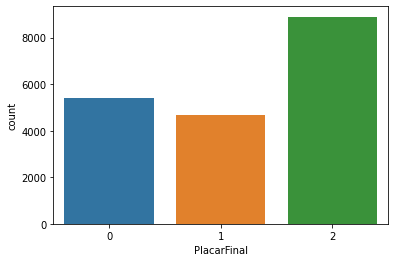

In [33]:
import seaborn as sns
ax = sns.countplot(x=y)

In [34]:
'''
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X, y = nr.fit_sample(X, y)
'''


'\nfrom imblearn.under_sampling import NearMiss\nnr = NearMiss()\nX, y = nr.fit_sample(X, y)\n'

In [35]:
#ax = sns.countplot(x=y)

<AxesSubplot:>

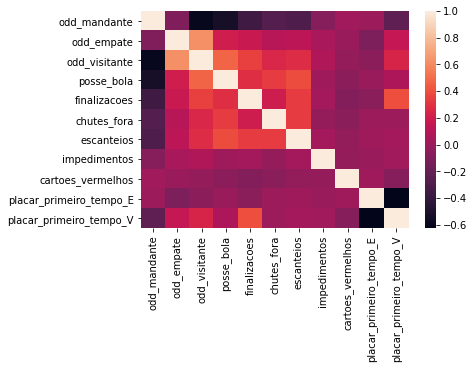

In [36]:
sns.heatmap(X.corr())

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
lm = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [39]:
X

,odd_mandante,odd_empate,odd_visitante,posse_bola,finalizacoes,chutes_fora,escanteios,impedimentos,cartoes_vermelhos,placar_primeiro_tempo_E,placar_primeiro_tempo_V
0,0.114243,0.067164,0.034400,0.588235,0.40,0.478261,0.291667,0.4375,0.50,1.0,0.0
1,0.053850,0.093817,0.064575,0.588235,0.44,0.565217,0.541667,0.4375,0.50,1.0,0.0
2,0.033719,0.104478,0.124925,0.588235,0.56,0.608696,0.458333,0.4375,0.50,0.0,1.0
3,0.094112,0.061834,0.042446,0.588235,0.72,0.652174,0.541667,0.4375,0.50,1.0,0.0
4,0.053850,0.071429,0.084691,0.588235,0.44,0.565217,0.416667,0.4375,0.50,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19008,0.194766,0.061834,0.020318,0.494118,0.32,0.478261,0.125000,0.5000,0.50,0.0,1.0
19009,0.073981,0.051173,0.061155,0.529412,0.44,0.521739,0.416667,0.4375,0.50,0.0,1.0
19010,0.161047,0.051173,0.026755,0.305882,0.36,0.478261,0.375000,0.5625,0.75,1.0,0.0
19011,0.161047,0.051173,0.026755,0.482353,0.48,0.565217,0.583333,0.4375,0.50,1.0,0.0


In [40]:
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_ #Mostra a importância de cada atributo

array([0.12092128, 0.09855397, 0.11538498, 0.11152906, 0.0858849 ,
       0.08753313, 0.08940652, 0.08335287, 0.0102274 , 0.04932275,
       0.14788315])

In [41]:
X.columns

Index(['odd_mandante', 'odd_empate', 'odd_visitante', 'posse_bola',
       'finalizacoes', 'chutes_fora', 'escanteios', 'impedimentos',
       'cartoes_vermelhos', 'placar_primeiro_tempo_E',
       'placar_primeiro_tempo_V'],
      dtype='object')

In [42]:
##MODELOS
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier, 
                              RandomForestClassifier)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
##Classe modelo auxiliar
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
            
    def predict(self,x):
        return self.clf.predict(x)
    def fit(self,x,y):
        return self.clf.fit(x,y)
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    def score(self,x,y):
        return self.clf.score(x,y)

In [45]:
modelos = [{'nome': 'logreg', 'modelo': LogisticRegression},
          {'nome': 'etree', 'modelo': ExtraTreesClassifier},
          {'nome': 'gradboost', 'modelo': GradientBoostingClassifier},
          {'nome': 'adaboost', 'modelo': AdaBoostClassifier},
          {'nome': 'SVC', 'modelo': SVC},
          {'nome': 'KNN', 'modelo': KNeighborsClassifier},
          {'nome': 'GaussianNB', 'modelo': GaussianNB},
          {'nome': 'Perceptron', 'modelo': Perceptron},
          {'nome': 'LinearSVC', 'modelo': LinearSVC},
          {'nome': 'SGD', 'modelo': SGDClassifier},
          {'nome': 'DTree', 'modelo': DecisionTreeClassifier},
          {'nome': 'RForest', 'modelo': RandomForestClassifier}
          ]

In [46]:
resultados = []
for model in modelos:
    x = ModeloAuxiliar(clf=model['modelo'])
    #treinar o modelo
    x.fit(X_train, y_train)
    #gerar predição
    x_pred = x.predict(X_test)
    #gerar score
    acuracia = round(x.score(X_test, y_test)*100, 2)
    
    resultados.append({
        'nome': model['nome'],
        'score': acuracia,
        'pred': x_pred
    })

/home/heuller/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
models = pd.DataFrame(resultados)

In [48]:
models[['nome', 'score']].sort_values(by='score', ascending=False)

,nome,score
0,logreg,64.70
8,LinearSVC,64.57
3,adaboost,64.52
2,gradboost,64.39
4,SVC,63.91
11,RForest,62.55
1,etree,62.18
9,SGD,62.05
7,Perceptron,60.89
6,GaussianNB,60.81


In [49]:
clf1 = LogisticRegression(random_state=123).fit(X_train, y_train)
clf2 = LinearSVC(random_state=123).fit(X_train, y_train)
clf3 = AdaBoostClassifier(random_state=123).fit(X_train, y_train)
clf4 = GradientBoostingClassifier(random_state=123).fit(X_train, y_train)
clf5 = SVC(random_state=123).fit(X_train, y_train)
clf6 = RandomForestClassifier(random_state=123).fit(X_train, y_train)
clf7 = SGDClassifier(random_state=123).fit(X_train, y_train)
clf8 = ExtraTreesClassifier(random_state=123).fit(X_train, y_train)
clf9 = Perceptron(random_state=123).fit(X_train, y_train)
clf10 = GaussianNB().fit(X_train, y_train)
clf11 = KNeighborsClassifier().fit(X_train, y_train)
clf12 = DecisionTreeClassifier(random_state=123).fit(X_train, y_train)


/home/heuller/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
##LOGISTIC REGRESSION
from sklearn import metrics

modelo = LogisticRegression(random_state=123).fit(X_train, y_train)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
metrics.accuracy_score(y_test, y_pred)


/home/heuller/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/heuller/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

0.6470278800631246

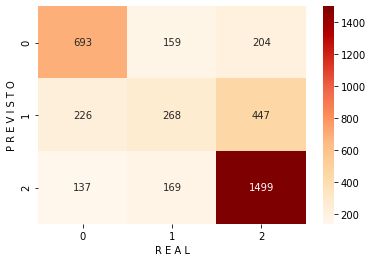

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [51]:
##CROSS VALIDATION LOGISTIC REGRESSION
from sklearn.model_selection import cross_val_score

modelo = LogisticRegression(random_state=123).fit(X_train, y_train)

train_scores = cross_val_score(modelo, X_test, y_test, scoring='accuracy', cv=10)
train_scores.mean()



/home/heuller/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/heuller/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

0.6478222130128471

In [52]:
##LINEAR SVC CROSS VALIDATION
from sklearn.model_selection import cross_val_score

modelo = LinearSVC(random_state=123).fit(X_train, y_train)

train_scores = cross_val_score(modelo, X_test, y_test, scoring='accuracy', cv=10)
train_scores.mean()

0.6509752728277387

In [58]:
modelo = Perceptron().fit(X_train, y_train)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
metrics.accuracy_score(y_test, y_pred)


0.608890057864282

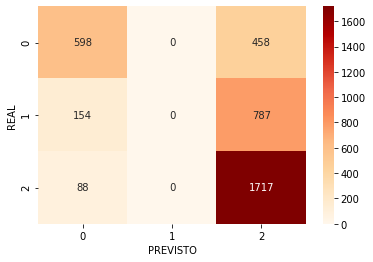

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.ylabel('REAL')
plt.xlabel('PREVISTO')
plt.show()

In [54]:
'''
SVCModel = SVC()

param={'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
      'C':np.arange(1,42,10),
      'degree':np.arange(3,6),   
      'coef0':np.arange(0.001,3,0.5),
      'gamma': ('auto', 'scale')}
'''

"\nSVCModel = SVC()\n\nparam={'kernel':('linear', 'poly', 'rbf', 'sigmoid'),\n      'C':np.arange(1,42,10),\n      'degree':np.arange(3,6),   \n      'coef0':np.arange(0.001,3,0.5),\n      'gamma': ('auto', 'scale')}\n"

In [55]:
'''
from sklearn.model_selection import GridSearchCV
grid_object = GridSearchCV(estimator = SVCModel, param_grid = param, cv=5)
grid_object.fit(X_train, y_train)
'''

'\nfrom sklearn.model_selection import GridSearchCV\ngrid_object = GridSearchCV(estimator = SVCModel, param_grid = param, cv=5)\ngrid_object.fit(X_train, y_train)\n'

In [56]:
#grid_object.best_params_

In [57]:
'''
clf = LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear').fit(X_train, y_train)
y_pred = clf.predict(X_test)
'''

"\nclf = LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear').fit(X_train, y_train)\ny_pred = clf.predict(X_test)\n"

In [58]:
'''
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()
'''

"\nfrom sklearn.metrics import confusion_matrix\nimport seaborn as sns\n\nsns.heatmap(confusion_matrix(y_test, y_pred), cmap='OrRd', annot=True, fmt='2.0f')\nplt.ylabel('P R E V I S T O')\nplt.xlabel('R E A L')\nplt.show()\n"

In [59]:
#clf.score(X_test, y_test)

In [60]:
#y = y.map({'D': 0, 'E': 1, 'V': 2})

In [61]:

clfX = LogisticRegression(random_state=123)
clfY = LinearSVC(random_state=123)
clfZ = AdaBoostClassifier(random_state=123)

clfA = GradientBoostingClassifier(random_state=123)
clfB = SGDClassifier(random_state=123)

clfH = Perceptron(random_state=123)

In [77]:
classificadorX = ['LR', clfX]
classificadorY = ['LSVC', clfY]
classificadorZ = ['ADA', clfZ]
classificadorA = ['GB', clfA]
classificadorB = ['SGD', clfB]

classificadorH = ['Perceptron', clfH]


estimator1 = []
estimator2 = []
estimator3 = []
estimator4 = []
estimator5 = []
estimator6 = []
estimator7 = []
estimator8 = []
estimator9 = []
estimator10 = []

estimator11 = []

estimator11.append(classificadorZ)
estimator11.append(classificadorA)
estimator11.append(classificadorH)

estimator1.append(classificadorX)
estimator1.append(classificadorY)
estimator1.append(classificadorZ)


estimator2.append(classificadorX)
estimator2.append(classificadorZ)
estimator2.append(classificadorA)


estimator3.append(classificadorX)
estimator3.append(classificadorA)
estimator3.append(classificadorB)


estimator4.append(classificadorY)
estimator4.append(classificadorZ)
estimator4.append(classificadorA)


estimator5.append(classificadorY)
estimator5.append(classificadorA)
estimator5.append(classificadorB)


estimator6.append(classificadorZ)
estimator6.append(classificadorA)
estimator6.append(classificadorB)


estimator7.append(classificadorX)
estimator7.append(classificadorZ)
estimator7.append(classificadorB)


estimator8.append(classificadorX)
estimator8.append(classificadorY)
estimator8.append(classificadorA)


estimator9.append(classificadorX)
estimator9.append(classificadorY)
estimator9.append(classificadorB)

estimator10.append(classificadorY)
estimator10.append(classificadorZ)
estimator10.append(classificadorB)

'''
estimator = []
#estimator.append(['LR', clf1])
#estimator.append(['LSVC', clf2])
#stimator.append(['ADA', clf3])
estimator.append(['GNB', clf4])
estimator.append(['KNN', clf5])
estimator.append(['DT', clf6])
'''

"\nestimator = []\n#estimator.append(['LR', clf1])\n#estimator.append(['LSVC', clf2])\n#stimator.append(['ADA', clf3])\nestimator.append(['GNB', clf4])\nestimator.append(['KNN', clf5])\nestimator.append(['DT', clf6])\n"

In [78]:

from sklearn.ensemble import VotingClassifier 
from sklearn.metrics import accuracy_score
vot_hard = VotingClassifier(estimators = estimator11, voting ='hard') 
vot_hard.fit(X_train, y_train) 
y_pred = vot_hard.predict(X_test) 
  
# using accuracy_score metric to predict accuracy 
score = accuracy_score(y_test, y_pred) 
print(score)

train_scores = cross_val_score(vot_hard, X_test, y_test, scoring='accuracy', cv=10)
train_scores.mean()


0.6436086270384008


0.6433554358336788

In [79]:

from sklearn.metrics import confusion_matrix

y_pred = vot_hard.predict(X_test)


In [80]:
mat = confusion_matrix(y_test, y_pred)

In [81]:

from sklearn.metrics import precision_recall_fscore_support

print(precision_recall_fscore_support(y_test, y_pred))


(array([0.64684015, 0.43066667, 0.72267206]), array([0.65909091, 0.34325186, 0.79113573]), array([0.65290807, 0.38202247, 0.75535573]), array([1056,  941, 1805]))
